In [ ]:
# https://data-analysis-expertise.tistory.com/67

In [1]:
# 업비트 API 설치
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 7.4 MB/s 


In [2]:
# 라이브러리
import pyupbit
import pandas as pd
import time
import numpy as np


In [3]:
  # ticker = 가격 내역을 조회할 코인의 ticker
  # interval = 가격 조회 간격 -> 10분봉
  # count = 최근 몇일지의 데이터를 조회할지를 의미합니다. 
  #        (default값은 200입니다.), 행의 개수
  # to = 출력할 max date time을 지정합니다.
  # period = 데이터 요청 주기 (초) (default 값은 0.1 입니다.)

In [4]:
df = pyupbit.get_ohlcv(ticker='KRW-'+'BTC', interval='minute30', to='20220824 00:30:00', count=10000)

In [5]:
df

,open,high,low,close,volume,value
2022-01-27 19:00:00,45010000.0,45290000.0,44999000.0,45120000.0,120.699604,5.449319e+09
2022-01-27 19:30:00,45120000.0,45140000.0,44641000.0,44680000.0,124.149361,5.571149e+09
2022-01-27 20:00:00,44683000.0,45070000.0,44680000.0,45063000.0,105.043347,4.712414e+09
2022-01-27 20:30:00,45063000.0,45198000.0,44964000.0,45085000.0,208.478363,9.400854e+09
2022-01-27 21:00:00,45080000.0,45174000.0,44968000.0,45069000.0,177.910725,8.025123e+09
...,...,...,...,...,...,...
2022-08-24 07:00:00,29258000.0,29363000.0,29244000.0,29310000.0,48.099327,1.409912e+09
2022-08-24 07:30:00,29308000.0,29316000.0,29246000.0,29251000.0,39.139238,1.145906e+09
2022-08-24 08:00:00,29251000.0,29356000.0,29235000.0,29307000.0,37.481807,1.097833e+09
2022-08-24 08:30:00,29307000.0,29334000.0,29271000.0,29307000.0,59.285443,1.737083e+09


In [6]:
times = df.index
times

DatetimeIndex(['2022-01-27 19:00:00', '2022-01-27 19:30:00',
               '2022-01-27 20:00:00', '2022-01-27 20:30:00',
               '2022-01-27 21:00:00', '2022-01-27 21:30:00',
               '2022-01-27 22:00:00', '2022-01-27 22:30:00',
               '2022-01-27 23:00:00', '2022-01-27 23:30:00',
               ...
               '2022-08-24 04:30:00', '2022-08-24 05:00:00',
               '2022-08-24 05:30:00', '2022-08-24 06:00:00',
               '2022-08-24 06:30:00', '2022-08-24 07:00:00',
               '2022-08-24 07:30:00', '2022-08-24 08:00:00',
               '2022-08-24 08:30:00', '2022-08-24 09:00:00'],
              dtype='datetime64[ns]', length=10000, freq=None)

In [7]:
df.index.value_counts()

2022-01-27 19:00:00    1
2022-06-15 21:30:00    1
2022-06-15 18:00:00    1
2022-06-15 18:30:00    1
2022-06-15 19:00:00    1
                      ..
2022-04-07 07:30:00    1
2022-04-07 08:00:00    1
2022-04-07 08:30:00    1
2022-04-07 09:00:00    1
2022-08-24 09:00:00    1
Length: 10000, dtype: int64

In [8]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'value'], dtype='object')

In [9]:
target_prices = df['close'].values

In [10]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(target_prices) - sequence_length):
    result.append(target_prices[index: index + sequence_length])
    # 51개씩 append 하기, 마지막 하나는 예측하려는 값

In [11]:
target_prices[0: 0 + sequence_length]

array([45120000., 44680000., 45063000., 45085000., 45069000., 45095000.,
       45102000., 45197000., 45201000., 45266000., 45005000., 44865000.,
       44661000., 44689000., 44632000., 44510000., 44290000., 44453000.,
       44468000., 44556000., 44502000., 44218000., 44211000., 44886000.,
       44830000., 45341000., 45500000., 45809000., 45702000., 45709000.,
       45560000., 45564000., 45464000., 45549000., 45869000., 45900000.,
       45878000., 45831000., 45914000., 45760000., 45868000., 45543000.,
       45633000., 45575000., 45411000., 45542000., 45614000., 45445000.,
       45515000., 45563000., 45412000.])

In [13]:
target_prices.shape

(10000,)

In [14]:
len(result)

9949

## 방법 1

In [ ]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape,y_train.shape, y_test.shape

((8954, 50, 1), (995, 50, 1), (8954,), (995,))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(8954, 50, 1)
(995, 50, 1)


In [ ]:
pd.DataFrame(train)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,-0.000445,-0.000426,-0.002762,-0.003299,-0.003633,0.000482,0.001742,-0.002317,0.001612,...,0.044982,0.047169,0.049022,0.051654,0.048985,0.048559,0.049282,0.049393,0.051246,0.051043
1,0.0,-0.006799,-0.002910,-0.000773,0.007649,0.012439,0.010662,0.008138,0.023204,0.013675,...,0.027248,0.015993,0.013701,0.032811,0.032476,0.029669,0.025986,0.022148,0.023925,0.031059
2,0.0,-0.001993,-0.005341,-0.006657,-0.003573,-0.005641,-0.001692,-0.002219,-0.000715,-0.001354,...,0.004099,0.005792,0.006394,0.008500,0.006281,0.011245,0.009741,0.013427,0.013201,0.011546
3,0.0,-0.003064,-0.010889,-0.011065,-0.005932,-0.001620,-0.002322,-0.005698,-0.004820,-0.006167,...,-0.005327,-0.004254,-0.003981,-0.002771,0.000839,-0.012216,-0.007689,-0.007025,-0.005776,-0.003005
4,0.0,-0.001909,-0.005344,-0.009161,-0.004259,-0.004480,-0.002150,-0.005304,-0.006771,-0.005304,...,-0.014767,-0.013863,-0.014787,-0.016977,-0.017841,-0.015550,-0.016153,-0.016032,-0.016736,-0.016495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8949,0.0,0.003430,-0.002698,0.000084,0.003514,0.002071,0.005061,0.003869,0.010666,0.004810,...,-0.001966,-0.005333,-0.008387,0.002782,0.003053,-0.002823,-0.003325,-0.002698,-0.007362,-0.002510
8950,0.0,-0.001330,0.000148,0.001681,0.000443,-0.000240,-0.001884,0.003288,0.005412,0.005042,...,-0.018359,-0.020058,-0.019098,-0.018137,-0.024787,-0.021610,-0.022349,-0.021739,-0.020963,-0.021037
8951,0.0,0.008954,0.002222,-0.002386,-0.003758,0.000915,0.011111,0.003431,0.005131,0.000458,...,0.038856,0.038333,0.026275,0.019902,0.018366,0.014869,0.024346,0.024379,0.022614,0.021209
8952,0.0,-0.003704,-0.001563,-0.002398,0.005289,0.001692,-0.000878,-0.005118,-0.003148,-0.005739,...,-0.000064,0.001734,0.002934,0.006103,0.013597,0.018972,0.015289,0.009979,0.010600,0.006852


In [ ]:
train.shape

(8954, 51)

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
896/896 [==============================] - 17s 10ms/step - loss: 7.9969e-05 - val_loss: 1.2150e-05
Epoch 2/20
896/896 [==============================] - 8s 9ms/step - loss: 3.4750e-05 - val_loss: 7.7325e-05
Epoch 3/20
896/896 [==============================] - 8s 9ms/step - loss: 3.0634e-05 - val_loss: 1.0955e-05
Epoch 4/20
896/896 [==============================] - 8s 9ms/step - loss: 2.9253e-05 - val_loss: 4.1711e-05
Epoch 5/20
896/896 [==============================] - 8s 9ms/step - loss: 2.8739e-05 - val_loss: 2.3303e-05
Epoch 6/20
896/896 [==============================] - 8s 9ms/step - loss: 2.8136e-05 - val_loss: 1.0062e-05
Epoch 7/20
896/896 [==============================] - 8s 9ms/step - loss: 2.7035e-05 - val_loss: 1.1139e-05
Epoch 8/20
896/896 [==============================] - 8s 9ms/step - loss: 2.6978e-05 - val_loss: 2.8396e-05
Epoch 9/20
896/896 [==============================] - 8s 9ms/step - loss: 2.6672e-05 - val_loss: 2.3012e-05
Epoch 10/20
896/896 [=====

In [ ]:
pred_train = model.predict(x_train)

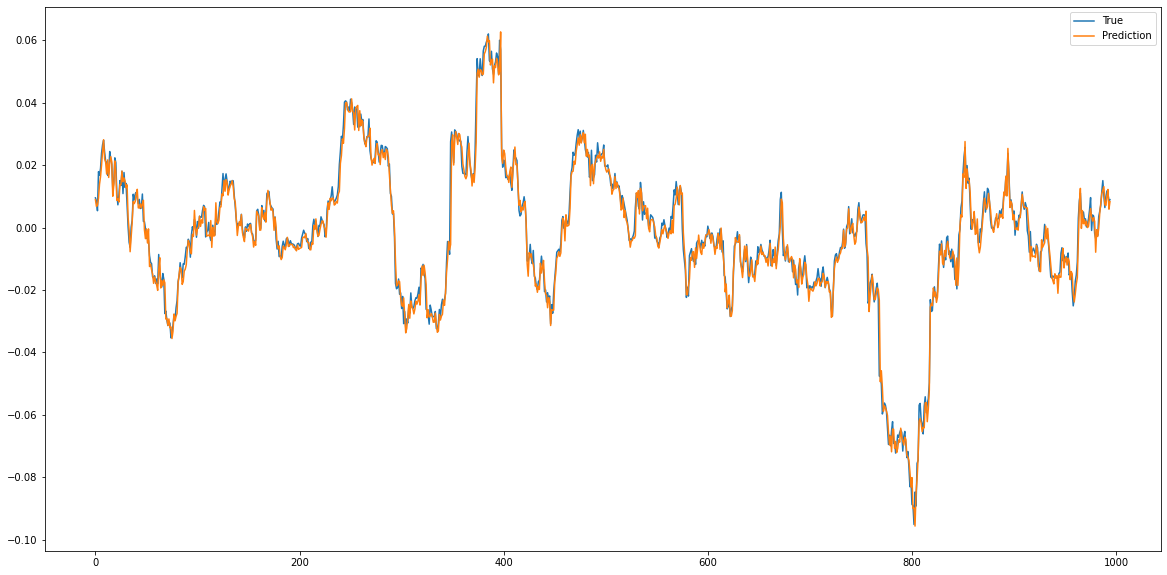

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
train_score = math.sqrt(mean_squared_error(y_train, pred_train))
print(f'Train Score(RMSE): {train_score}')
test_score = math.sqrt(mean_squared_error(y_test, pred))
print(f'Test Score(RMSE): {test_score}')

Train Score(RMSE): 0.004665615727989896
Test Score(RMSE): 0.0031951030855148113


## 방법 2

In [49]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

In [15]:
df

,open,high,low,close,volume,value
2022-01-27 19:00:00,45010000.0,45290000.0,44999000.0,45120000.0,120.699604,5.449319e+09
2022-01-27 19:30:00,45120000.0,45140000.0,44641000.0,44680000.0,124.149361,5.571149e+09
2022-01-27 20:00:00,44683000.0,45070000.0,44680000.0,45063000.0,105.043347,4.712414e+09
2022-01-27 20:30:00,45063000.0,45198000.0,44964000.0,45085000.0,208.478363,9.400854e+09
2022-01-27 21:00:00,45080000.0,45174000.0,44968000.0,45069000.0,177.910725,8.025123e+09
...,...,...,...,...,...,...
2022-08-24 07:00:00,29258000.0,29363000.0,29244000.0,29310000.0,48.099327,1.409912e+09
2022-08-24 07:30:00,29308000.0,29316000.0,29246000.0,29251000.0,39.139238,1.145906e+09
2022-08-24 08:00:00,29251000.0,29356000.0,29235000.0,29307000.0,37.481807,1.097833e+09
2022-08-24 08:30:00,29307000.0,29334000.0,29271000.0,29307000.0,59.285443,1.737083e+09


In [59]:
WINDOW_SIZE = 20
time_steps = 20
all_data = df
for_periods = 1

In [75]:
# training & test set 만들기
TEST_SIZE = 2000

ts_train = df[:-TEST_SIZE].values
ts_test = df[-TEST_SIZE:].values
ts_train_len = len(ts_train)
ts_test_len = len(ts_test)

In [76]:
# # scale the data
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0,1))
# sc1 = MinMaxScaler(feature_range=(0,1))
# ts_train_scaled = sc.fit_transform(ts_train)
# ts_test_scaled = sc.transform(ts_test)

In [109]:
# training 데이터의 samples와 time steps로 원본데이터 슬라이싱하기
X_train_full = []
y_train_full = []
y_train_stacked = []
for i in range(time_steps, ts_train_len - 1):
  X_train_full.append(ts_train[i-time_steps:i,0])
  y_train_full.append(ts_train[i:i+for_periods, 0])
X_train_full, y_train_full = np.array(X_train_full), np.array(y_train_full)

In [110]:
print(X_train_full.shape)
print(y_train_full.shape)

(7979, 20)
(7979, 1)


In [111]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc1 = MinMaxScaler()
X_train_full_scaled = sc.fit_transform(X_train_full)

y_train_full_scaled = sc1.fit_transform(y_train_full)

In [112]:
# 3차원으로 재구성하기
X_train_full_scaled = np.reshape(X_train_full_scaled, (X_train_full_scaled.shape[0], X_train_full_scaled.shape[1], 1))

In [114]:
print(X_train_full_scaled.shape)

(7979, 20, 1)


In [115]:
# Preparing to create X_test
# inputs = sc.transform(df.values)
inputs = df[len(df)-len(ts_test) - time_steps:]
# inputs = inputs.reshape(-1,1)

In [116]:
inputs = np.array(inputs)

In [117]:
X_test = []
for i in range(time_steps, ts_test_len + time_steps - for_periods):
  X_test.append(inputs[i-time_steps:i,0])
X_test = np.array(X_test)

# 스케일링
X_test_scaled = sc.transform(X_test)


X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [118]:
print(X_train_full_scaled.shape)
print(y_train_full_scaled.shape)
print(X_test_scaled.shape)

(7979, 20, 1)
(7979, 1)
(1999, 20, 1)


In [119]:
X_train_see = pd.DataFrame(np.reshape(X_train_full, (X_train_full.shape[0], X_train_full.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0
0,45010000.0,45120000.0,44683000.0,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,...,45005000.0,44864000.0,44661000.0,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,50962000.0
1,45120000.0,44683000.0,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,...,44864000.0,44661000.0,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,46060000.0
2,44683000.0,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,45005000.0,...,44661000.0,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,44503000.0,37776000.0
3,45063000.0,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,45005000.0,44864000.0,...,44689000.0,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,44503000.0,44218000.0,49076000.0
4,45080000.0,45066000.0,45094000.0,45102000.0,45197000.0,45201000.0,45266000.0,45005000.0,44864000.0,44661000.0,...,44615000.0,44510000.0,44290000.0,44512000.0,44468000.0,44559000.0,44503000.0,44218000.0,44132000.0,53443000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,25768000.0,25832000.0,25939000.0,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,...,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,NaN
7975,25832000.0,25939000.0,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,...,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,NaN
7976,25939000.0,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,...,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,NaN
7977,25906000.0,25935000.0,25748000.0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,...,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,NaN


In [120]:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,25860000.0,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0
1,25730000.0,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0
2,25757000.0,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0,26193000.0
3,25723000.0,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0,26193000.0,26245000.0
4,25734000.0,25799000.0,25757000.0,25822000.0,25845000.0,25884000.0,25881000.0,25819000.0,25816000.0,25772000.0,25779000.0,25833000.0,25769000.0,25836000.0,25807000.0,26057000.0,26143000.0,26193000.0,26245000.0,26100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,29272000.0,29306000.0,29243000.0,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0
1995,29306000.0,29243000.0,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0,29204000.0
1996,29243000.0,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0,29204000.0,29258000.0
1997,29239000.0,29293000.0,29345000.0,29426000.0,29284000.0,29304000.0,29305000.0,29176000.0,29284000.0,29249000.0,29240000.0,29329000.0,29306000.0,29290000.0,29288000.0,29353000.0,29257000.0,29204000.0,29258000.0,29308000.0


In [121]:
print(X_train_full_scaled.shape)
print(X_test_scaled.shape)

(7979, 20, 1)
(1999, 20, 1)


In [129]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full_scaled, y_train_full_scaled, test_size=0.2)

In [130]:
y_train

array([[0.8377288 ],
       [0.05289389],
       [0.68453529],
       ...,
       [0.41015752],
       [0.13026195],
       [0.76558189]])

In [131]:
print('There are '+str(X_train.shape[0]) + ' samples in the training data')
print('There are '+str(X_valid.shape[0]) + ' samples in the validation data')
print('There are '+str(X_test.shape[0]) + ' samples in the test data')

There are 6383 samples in the training data
There are 1596 samples in the validation data
There are 1999 samples in the test data


In [132]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.optimizers import SGD

In [133]:
my_lstm = Sequential()
my_lstm.add(LSTM(units=50,
                 return_sequences=True,
                 input_shape = (X_train.shape[1], 1),
                 activation='tanh'))
my_lstm.add(LSTM(units=50, activation='tanh'))
my_lstm.add(Dense(units=1))

In [134]:
# 컴파일링
my_lstm.compile(optimizer = 'adam',
                loss = 'mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', save_best_only=True, mode='auto')

history = my_lstm.fit(X_train, y_train, 
                                    epochs=50, 
                                    batch_size=150,
                                    validation_data=(X_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint],
                                    verbose=1)

Epoch 1/50
43/43 [==============================] - 5s 24ms/step - loss: 0.0584 - val_loss: 0.0026
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 2.2844e-04
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 2.0363e-04 - val_loss: 1.9517e-04
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 1.9645e-04 - val_loss: 1.9465e-04
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 1.9457e-04 - val_loss: 1.9288e-04
Epoch 6/50
43/43 [==============================] - 0s 8ms/step - loss: 1.9381e-04 - val_loss: 1.9024e-04
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 1.9261e-04 - val_loss: 1.9386e-04
Epoch 8/50
43/43 [==============================] - 0s 7ms/step - loss: 1.9195e-04 - val_loss: 1.8888e-04
Epoch 9/50
43/43 [==============================] - 0s 7ms/step - loss: 1.9185e-04 - val_loss: 1.9088e-04
Epoch 10/50
43/43 [==============================] - 0s 7

In [135]:
lstm_prediction = my_lstm.predict(X_test_scaled)
print(lstm_prediction)

[[0.0568448 ]
 [0.05751963]
 [0.05847245]
 ...
 [0.15733442]
 [0.15729211]
 [0.15721866]]


In [137]:
lstm_prediction = sc1.inverse_transform(lstm_prediction)

In [138]:
lstm_prediction.shape

(1999, 1)

In [139]:
lstm_prediction

array([[25839182.],
       [25861928.],
       [25894048.],
       ...,
       [29226586.],
       [29225160.],
       [29222684.]], dtype=float32)

In [187]:
actual_pred = pd.DataFrame(columns = ['close', 'prediction'])
actual_pred['close'] = df.iloc[8000:, 3][0:len(lstm_prediction)]

In [192]:
actual_pred['prediction'] = lstm_prediction[:,0]

In [193]:
actual_pred

,close,prediction
2022-07-13 17:30:00,26192000.0,25839182.0
2022-07-13 18:00:00,26243000.0,25861928.0
2022-07-13 18:30:00,26100000.0,25894048.0
2022-07-13 19:00:00,26056000.0,25933660.0
2022-07-13 19:30:00,26083000.0,25969822.0
...,...,...
2022-08-24 06:30:00,29268000.0,29233472.0
2022-08-24 07:00:00,29310000.0,29230200.0
2022-08-24 07:30:00,29251000.0,29226586.0
2022-08-24 08:00:00,29307000.0,29225160.0


In [198]:
actual_pred['close'].values

array([26192000., 26243000., 26100000., ..., 29251000., 29307000.,
       29307000.])

In [196]:
actual_pred.iloc[:,1]

2022-07-13 17:30:00    25839182.0
2022-07-13 18:00:00    25861928.0
2022-07-13 18:30:00    25894048.0
2022-07-13 19:00:00    25933660.0
2022-07-13 19:30:00    25969822.0
                          ...    
2022-08-24 06:30:00    29233472.0
2022-08-24 07:00:00    29230200.0
2022-08-24 07:30:00    29226586.0
2022-08-24 08:00:00    29225160.0
2022-08-24 08:30:00    29222684.0
Name: prediction, Length: 1999, dtype: float32

In [199]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(actual_pred['close'].values, actual_pred.iloc[:,1].values)**0.5

In [200]:
RMSE

275439.52345427184

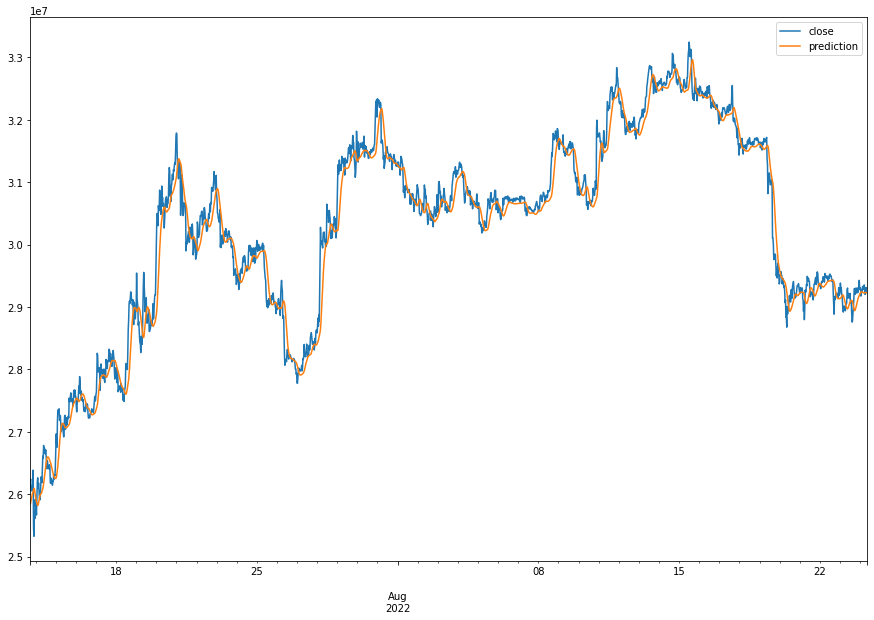

In [205]:
actual_pred.plot(figsize=(15,10))